In [1]:
import json
import threading
import math
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import arff
import matplotlib.pyplot as plt
plt.style.use('bmh')


import warnings
warnings.simplefilter(action='ignore')

def sigificant_digit(number, digits=2):
    return round(number, digits - int(math.floor(math.log10(abs(number)))) - 1)

In [2]:
records_partition = pd.read_csv("results/partition_records2.csv") 

pd.set_option('display.max_columns', None)
records_partition = records_partition.set_index('Unnamed: 0', drop=True)

partition_num = threading.active_count() 
fontsize=19
font_scale=2

In [3]:
records_partition

,QABBA (VQ) partition=1,QABBA (VQ) partition=2,QABBA (VQ) partition=3,QABBA (VQ) partition=4,QABBA (VQ) partition=5,QABBA (VQ) partition=6,QABBA (VQ) partition=7,QABBA (VQ) partition=8,QABBA (GA) partition=1,QABBA (GA) partition=2,QABBA (GA) partition=3,QABBA (GA) partition=4,QABBA (GA) partition=5,QABBA (GA) partition=6,QABBA (GA) partition=7,QABBA (GA) partition=8,ABBA,fABBA
Unnamed: 0,,,,,,,,,,,,,,,,,,
runtime,89.174749,75.068781,74.319766,68.225794,69.113889,65.691319,66.911340,62.539537,27.078649,15.385366,10.609715,7.314136,6.042076,5.002227,4.720546,4.255520,126.081151,26.789850
compression rate,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420,0.996420
symbols,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000,358.000000
mse,8.078448,2.674154,11.307021,5.229055,2.761215,2.795603,3.622738,3.203679,20.874271,11.212051,16.897590,10.733970,7.945061,8.897161,7.381819,6.687849,4.271889,7.497356


In [4]:
partition_num 

8

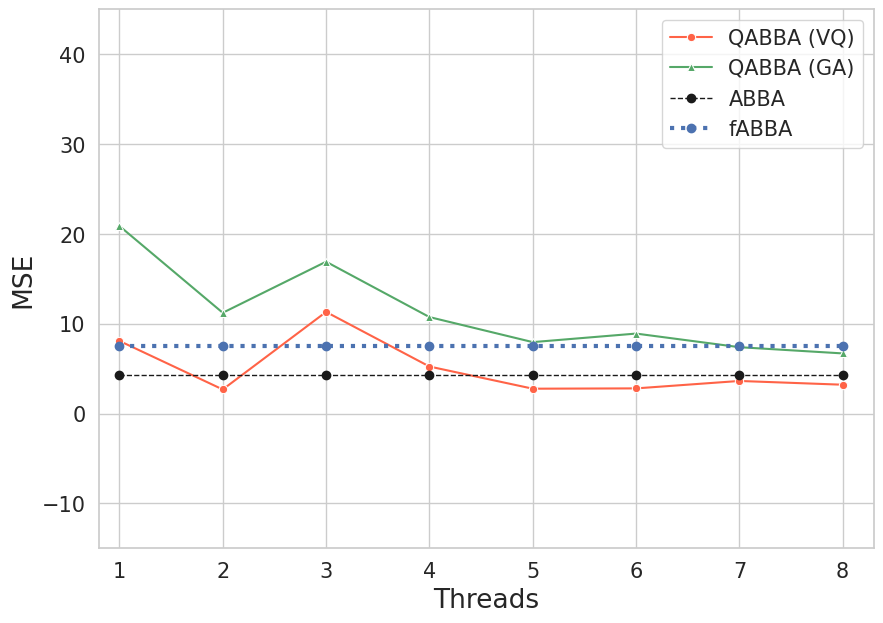

In [5]:
plt.figure(figsize=(10,7))
sns.set(font_scale=font_scale, style="whitegrid")

markersize = 150
plt.rcParams['axes.facecolor'] = 'white'
# sns.regplot(x=np.arange(1, partition_num+1), y=records_partition.values[3,:][:partition_num],
#             order=1, color='tomato', 
#             marker='o', line_kws = {'linewidth':3, 'color': 'r'}, 
#             scatter_kws={'s':markersize}, label='QABBA (VQ)')

# sns.regplot(x=np.arange(1, partition_num+1),
#             y=records_partition.values[3,:][partition_num:2*partition_num], 
#             order=1, color='g', 
#             marker='^', line_kws = {'linewidth':3, 'color': 'darkgreen'}, 
#             scatter_kws={'s':markersize}, label='QABBA (GA)') 

sns.lineplot(x=np.arange(1, partition_num+1), y=records_partition.values[3,:][:partition_num],
            color='tomato', 
            marker='o',
             label='QABBA (VQ)')

sns.lineplot(x=np.arange(1, partition_num+1),
            y=records_partition.values[3,:][partition_num:2*partition_num], 
            color='g', 
            marker='^', 
            label='QABBA (GA)') 

plt.plot(np.arange(1, partition_num+1, dtype=int),
         [records_partition.values[3,:][-2]]*partition_num, linewidth=1, 
         color='k', marker='o', linestyle='--', label='ABBA')

plt.plot(np.arange(1, partition_num+1, dtype=int),
         [records_partition.values[3,:][-1]]*partition_num, linewidth=3, 
         color='b', marker='o', linestyle=':', label='fABBA')

# plt.gca().set_xlabel('number of partitions', fontsize=fontsize)
plt.gca().set_ylabel('MSE', fontsize=fontsize)
plt.gca().set_xlabel('Threads', fontsize=fontsize)
# plt.title('Performance Comparison of Clustering Implementations')
plt.gca().axis([0.8, partition_num+0.3, -15, 45])
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid(True)
plt.legend(fontsize=fontsize-4)
plt.savefig('figs/mse_u_threads.pdf', bbox_inches='tight') 
plt.show()

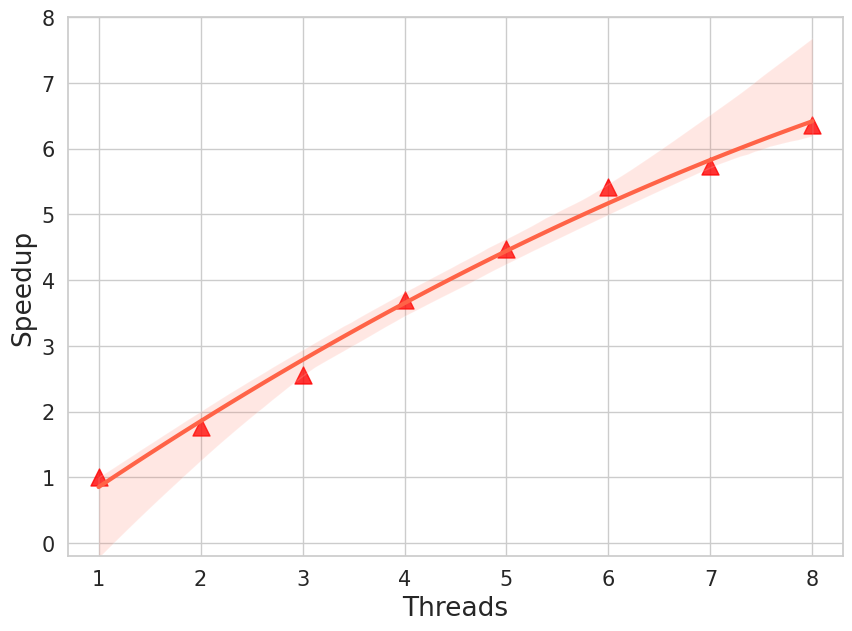

In [6]:
np.random.seed(42)
speedup = records_partition.iloc[0, partition_num] / records_partition.iloc[0, partition_num:2*partition_num].values[0:]
plt.figure(figsize=(10,7))
# plt.plot(np.arange(1, partition_num+1), speedup, linewidth=8)
sns.regplot(x=np.arange(1, partition_num+1), 
            y=speedup, order=2, color='red', 
            marker='^', line_kws = {'linewidth':3, 'color': 'tomato'}, 
            scatter_kws={'s':markersize}) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().set_ylabel('Speedup', fontsize=fontsize)
plt.gca().set_xlabel('Threads', fontsize=fontsize)
plt.gca().axis([0.7, partition_num+0.3, -0.2, 8])
plt.savefig('figs/ga_speedup.pdf', bbox_inches='tight') 

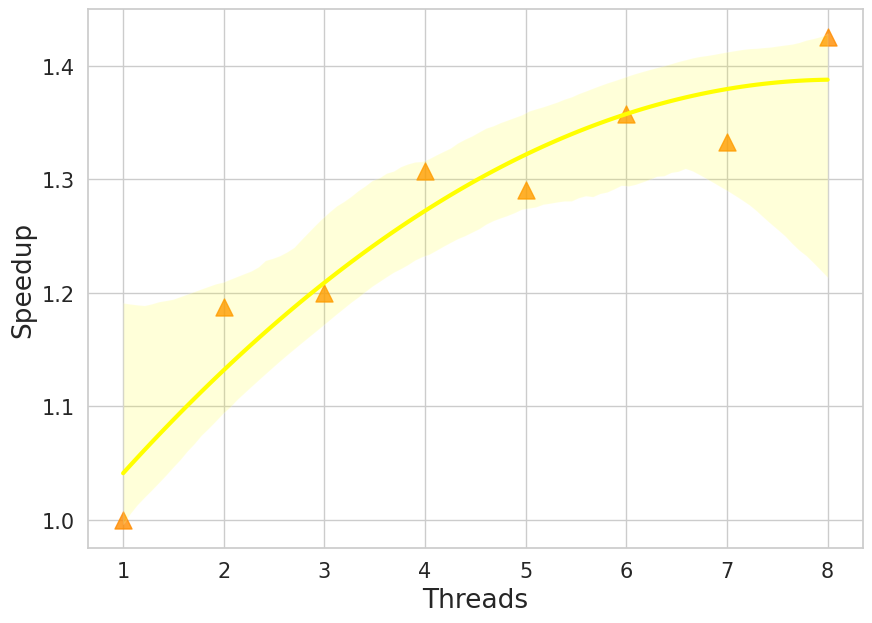

In [7]:
np.random.seed(42)
speedup = records_partition.iloc[0, 0] / records_partition.iloc[0, 0:partition_num].values[0:]
plt.figure(figsize=(10,7))
# plt.plot(np.arange(1, partition_num+1), speedup, linewidth=8, c='r')
sns.regplot(x=np.arange(1, partition_num+1),
            y=speedup, order=2, color='darkorange', 
            marker='^', line_kws = {'linewidth':3, 'color': 'yellow'}, 
            scatter_kws={'s':markersize}) 
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().set_ylabel('Speedup', fontsize=fontsize)
plt.gca().set_xlabel('Threads', fontsize=fontsize)
# plt.gca().axis([0.7, partition_num+0.3, 0.5, 6])
plt.savefig('figs/vq_speedup.pdf', bbox_inches='tight') 